In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [1]:
!pip install -Uqq fastai

In [6]:
from fastai.vision.all import *

In [2]:
path = '/kaggle/input/cat-and-dog/test_set'
path

'/kaggle/input/cat-and-dog/test_set'

In [13]:
fns = get_image_files(path)
fns[0]

Path('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg')

In [12]:
#this line is to check if an image is corrupted
failed = verify_images(fns)
failed
#obviosly no images are corrupted as iam using a complete dataset

(#0) []

In [41]:
catdog = DataBlock(blocks = (ImageBlock , CategoryBlock), get_items = get_image_files,
                  get_y = parent_label, item_tfms=Resize(128),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [42]:
dls = catdog.dataloaders(path)

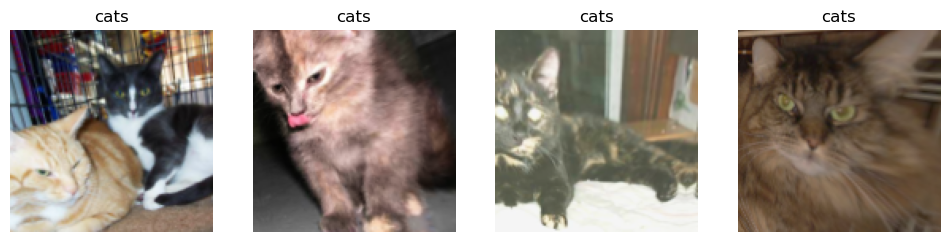

In [51]:
dls.train.show_batch(max_n=4 ,nrows=1 )
#this is used to show a patch of the data

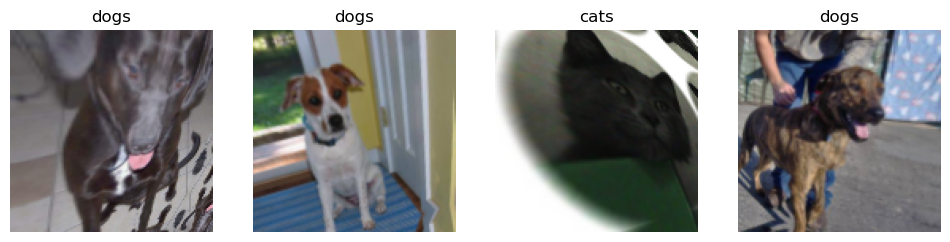

In [53]:
catdog.new(item_tfms=Resize(128, ResizeMethod.Squish))
item_tfms=Resize(128, ResizeMethod.Squish)
dls.train.show_batch(max_n=4 ,nrows=1 )

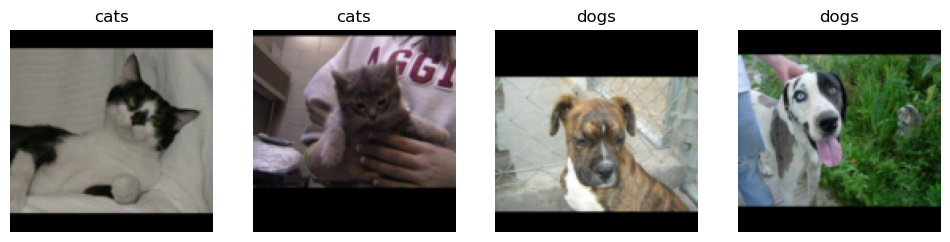

In [54]:
catdog = catdog.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = catdog.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1)

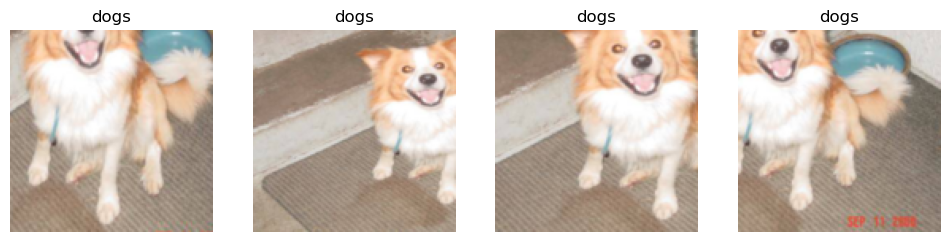

In [55]:
catdog = catdog.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = catdog.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique = True)

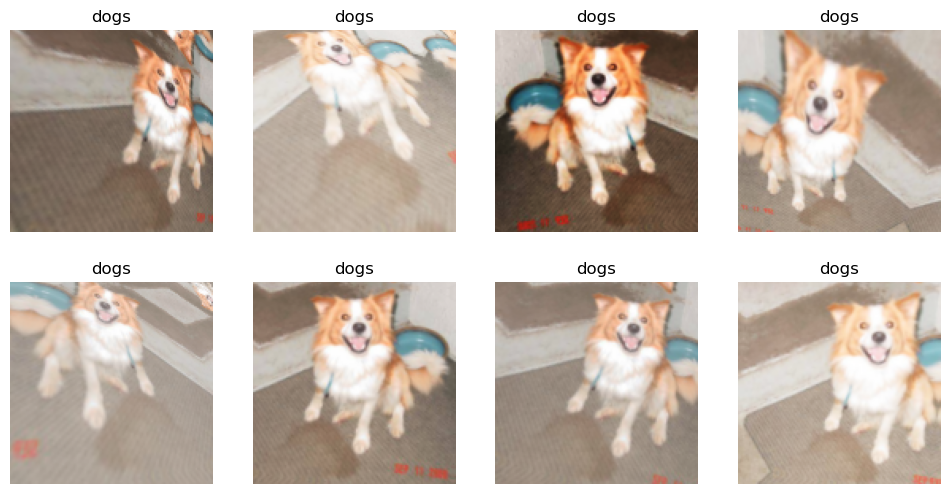

In [57]:
catdog = catdog.new(item_tfms=Resize(128),batch_tfms = aug_transforms(mult = 2))
dls = catdog.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique = True)

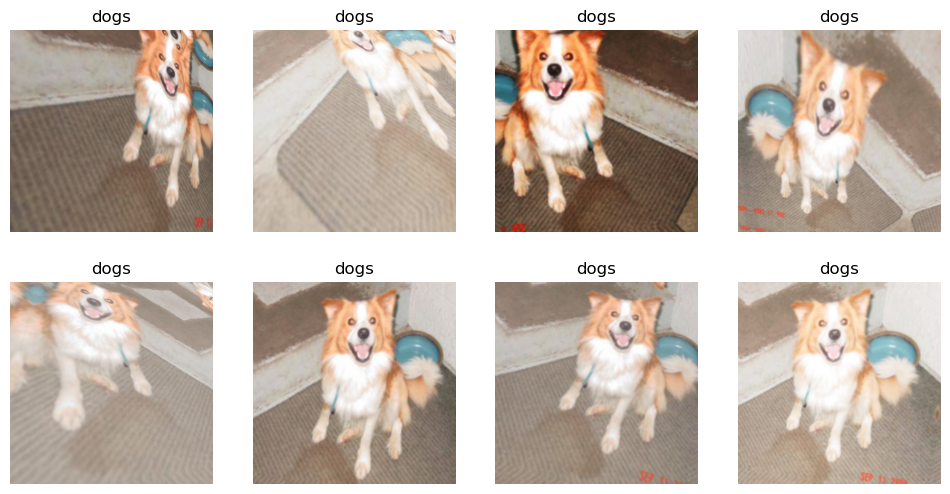

In [58]:
#final
catdog = catdog.new(item_tfms=RandomResizedCrop(224 , min_scale = 0.5),
                    batch_tfms = aug_transforms(mult = 2))
dls = catdog.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique = True)

In [60]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

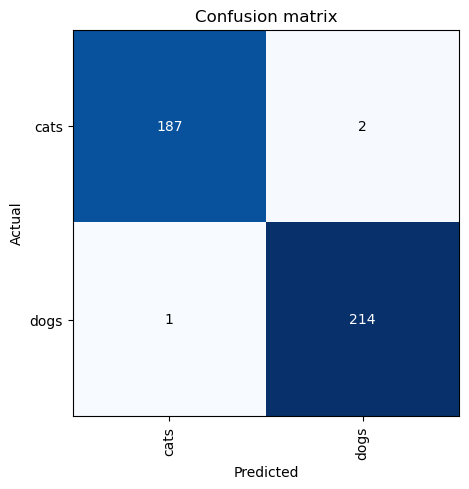

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

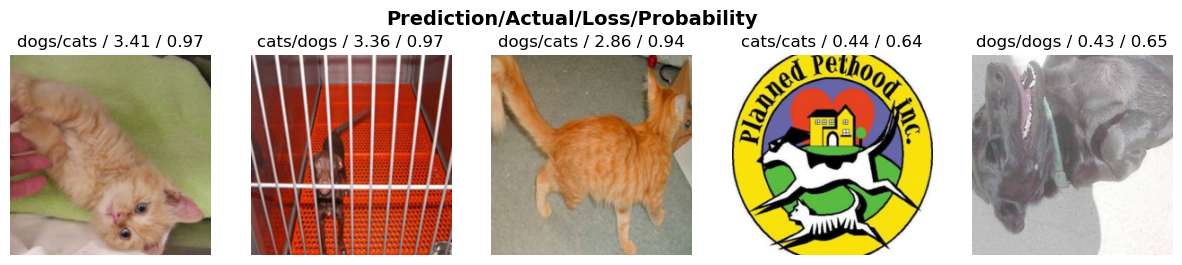

In [62]:
interp.plot_top_losses(5, nrows=1)

In [65]:
learn.export()

In [74]:
learn.predict('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg')

('cats', tensor(0), tensor([1.0000e+00, 7.2181e-09]))

In [75]:
learn.dls.vocab

['cats', 'dogs']

In [79]:
!pip install ipywidgets==7.6. 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.1 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [82]:
import ipywidgets as widgets

In [83]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

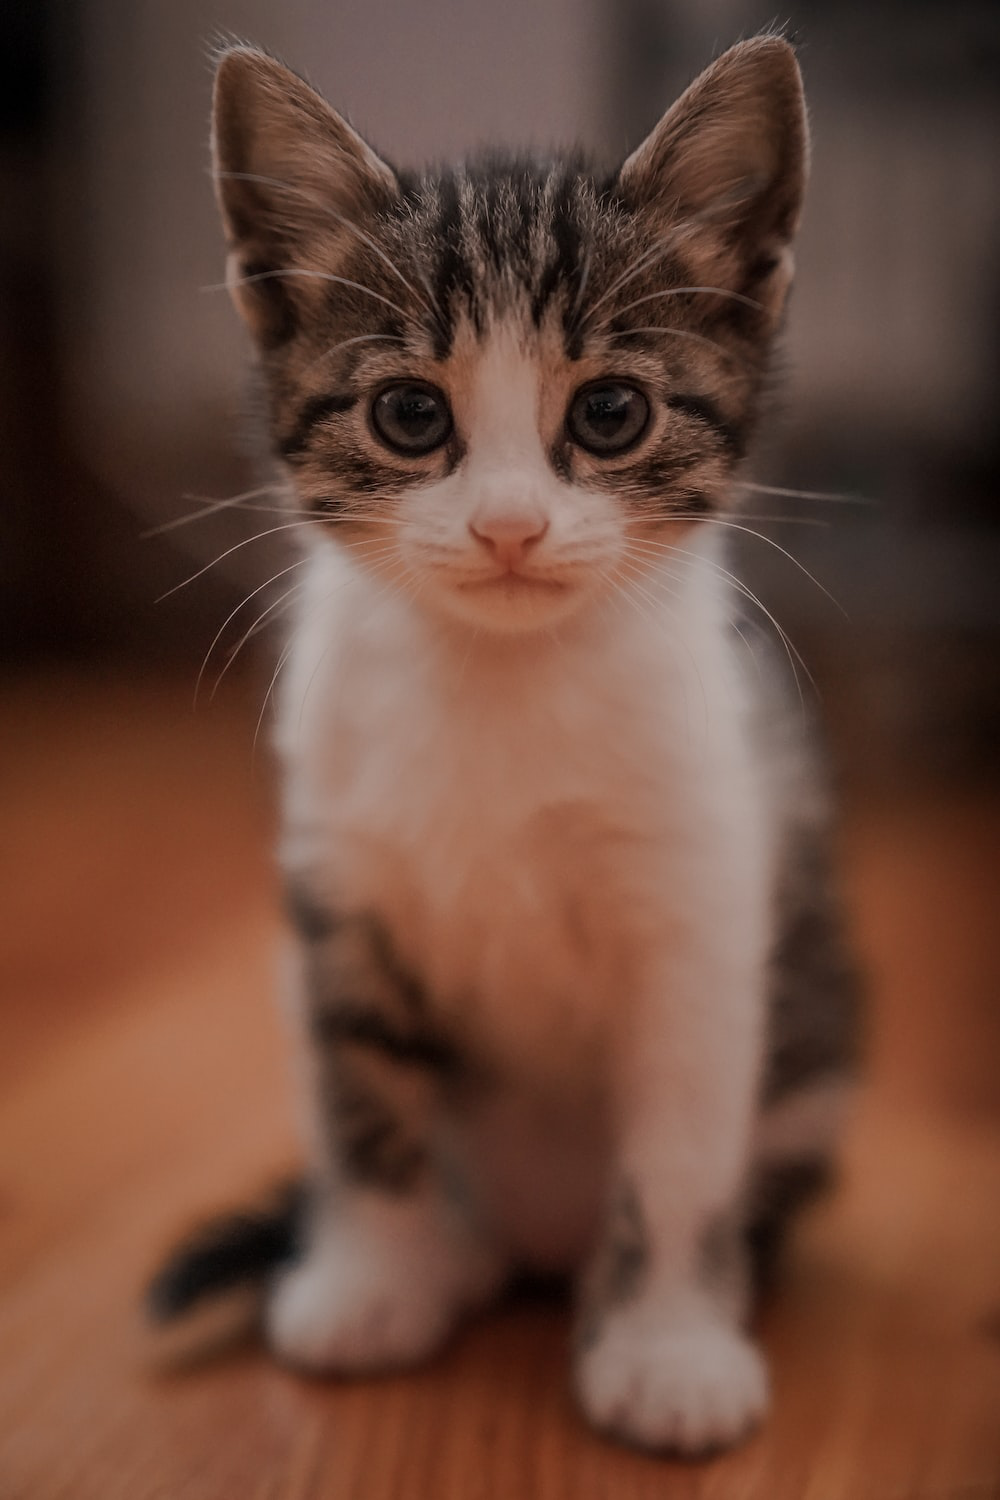

In [86]:
img = PILImage.create(btn_upload.data[-1])
img

In [88]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [89]:
pred,pred_idx,probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cats; Probability: 1.0000')

In [90]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [92]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
    

In [94]:
btn_run.on_click(on_click_classify)

In [98]:
from ipywidgets import *
VBox([widgets.Label('Select your image!'),
btn_upload, btn_run, out_pl, lbl_pred])

In [97]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.8 MB/s eta 0:00:0000:0100:01
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.4.0 OK
